<a href="https://colab.research.google.com/github/Smith-S-S/Computer-Vision/blob/main/car__crash_YOLOv8_Nano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing the Required Libraries**

In [6]:
import os

In [7]:
import glob

In [8]:
from IPython.display import Image, display

In [9]:
from IPython import display

In [10]:
display.clear_output()

# **In the First Step, We need to check whether we have access to the GPU or not**

In [11]:
!nvidia-smi

Wed Mar  6 14:22:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [12]:
HOME = os.getcwd()

In [13]:
print(HOME)

/content


#**Installing Ultralytics using Pip Install**

In [14]:
!pip install ultralytics

##Checking whether YOLOv8 is Installed and its working Fine

In [15]:
import ultralytics

In [16]:
ultralytics.checks()

Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.6/78.2 GB disk)


#**Importing the American Sign Language Alphabets Dataset from Roboflow**

In [17]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets


In [43]:



!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="R38i0N5gBDDkzbmApwoO")
project = rf.workspace("ansonlau1325-gmail-com").project("car-crash-severity-detection")
version = project.version(13)
dataset = version.download("yolov8")




loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.24, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Car-Crash-Severity-Detection-13 in yolov8:: 100%|██████████| 3824/3824 [00:00<00:00, 10083.73it/s]


#**Train the YOLOv8 Model on the Custom Dataset**

In [44]:
%cd {HOME}

/content


In [45]:
%cd {dataset.location}

/content/Car-Crash-Severity-Detection-13


In [47]:
%cd {HOME}


!yolo task=detect mode=train model=yolov8n.pt data='/content/Car-Crash-Severity-Detection-13/data.yaml' epochs=100 patience=300

/content
Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Car-Crash-Severity-Detection-13/data.yaml, epochs=100, time=None, patience=300, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

In [31]:
!ls {HOME}/runs/detect/train5/

args.yaml					    P_curve.png		 train_batch1891.jpg
confusion_matrix_normalized.png			    PR_curve.png	 train_batch1892.jpg
confusion_matrix.png				    R_curve.png		 train_batch1.jpg
events.out.tfevents.1709735042.2a982708b00c.2256.0  results.csv		 train_batch2.jpg
F1_curve.png					    results.png		 val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	 val_batch0_pred.jpg
labels.jpg					    train_batch1890.jpg  weights


#**Displaying the Confusion Matrix**

In [33]:
import matplotlib.pyplot as plt


In [35]:
img = plt.imread('/content/runs/detect/train5/confusion_matrix.png')

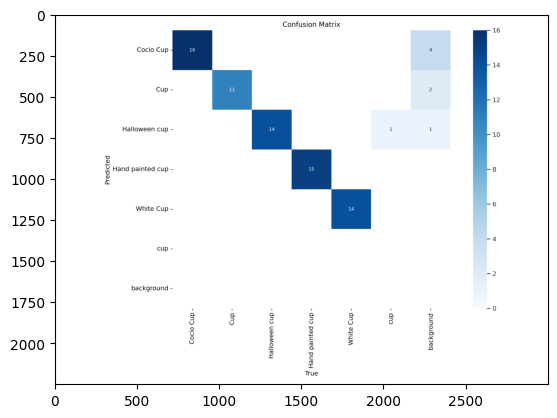

In [36]:
plt.imshow(img)


In [32]:
Image(filename=f'{HOME}confusion_matrix.png', width=900)

FileNotFoundError: [Errno 2] No such file or directory: '/contentconfusion_matrix.png'

#**Training and Validation Loss**

/content


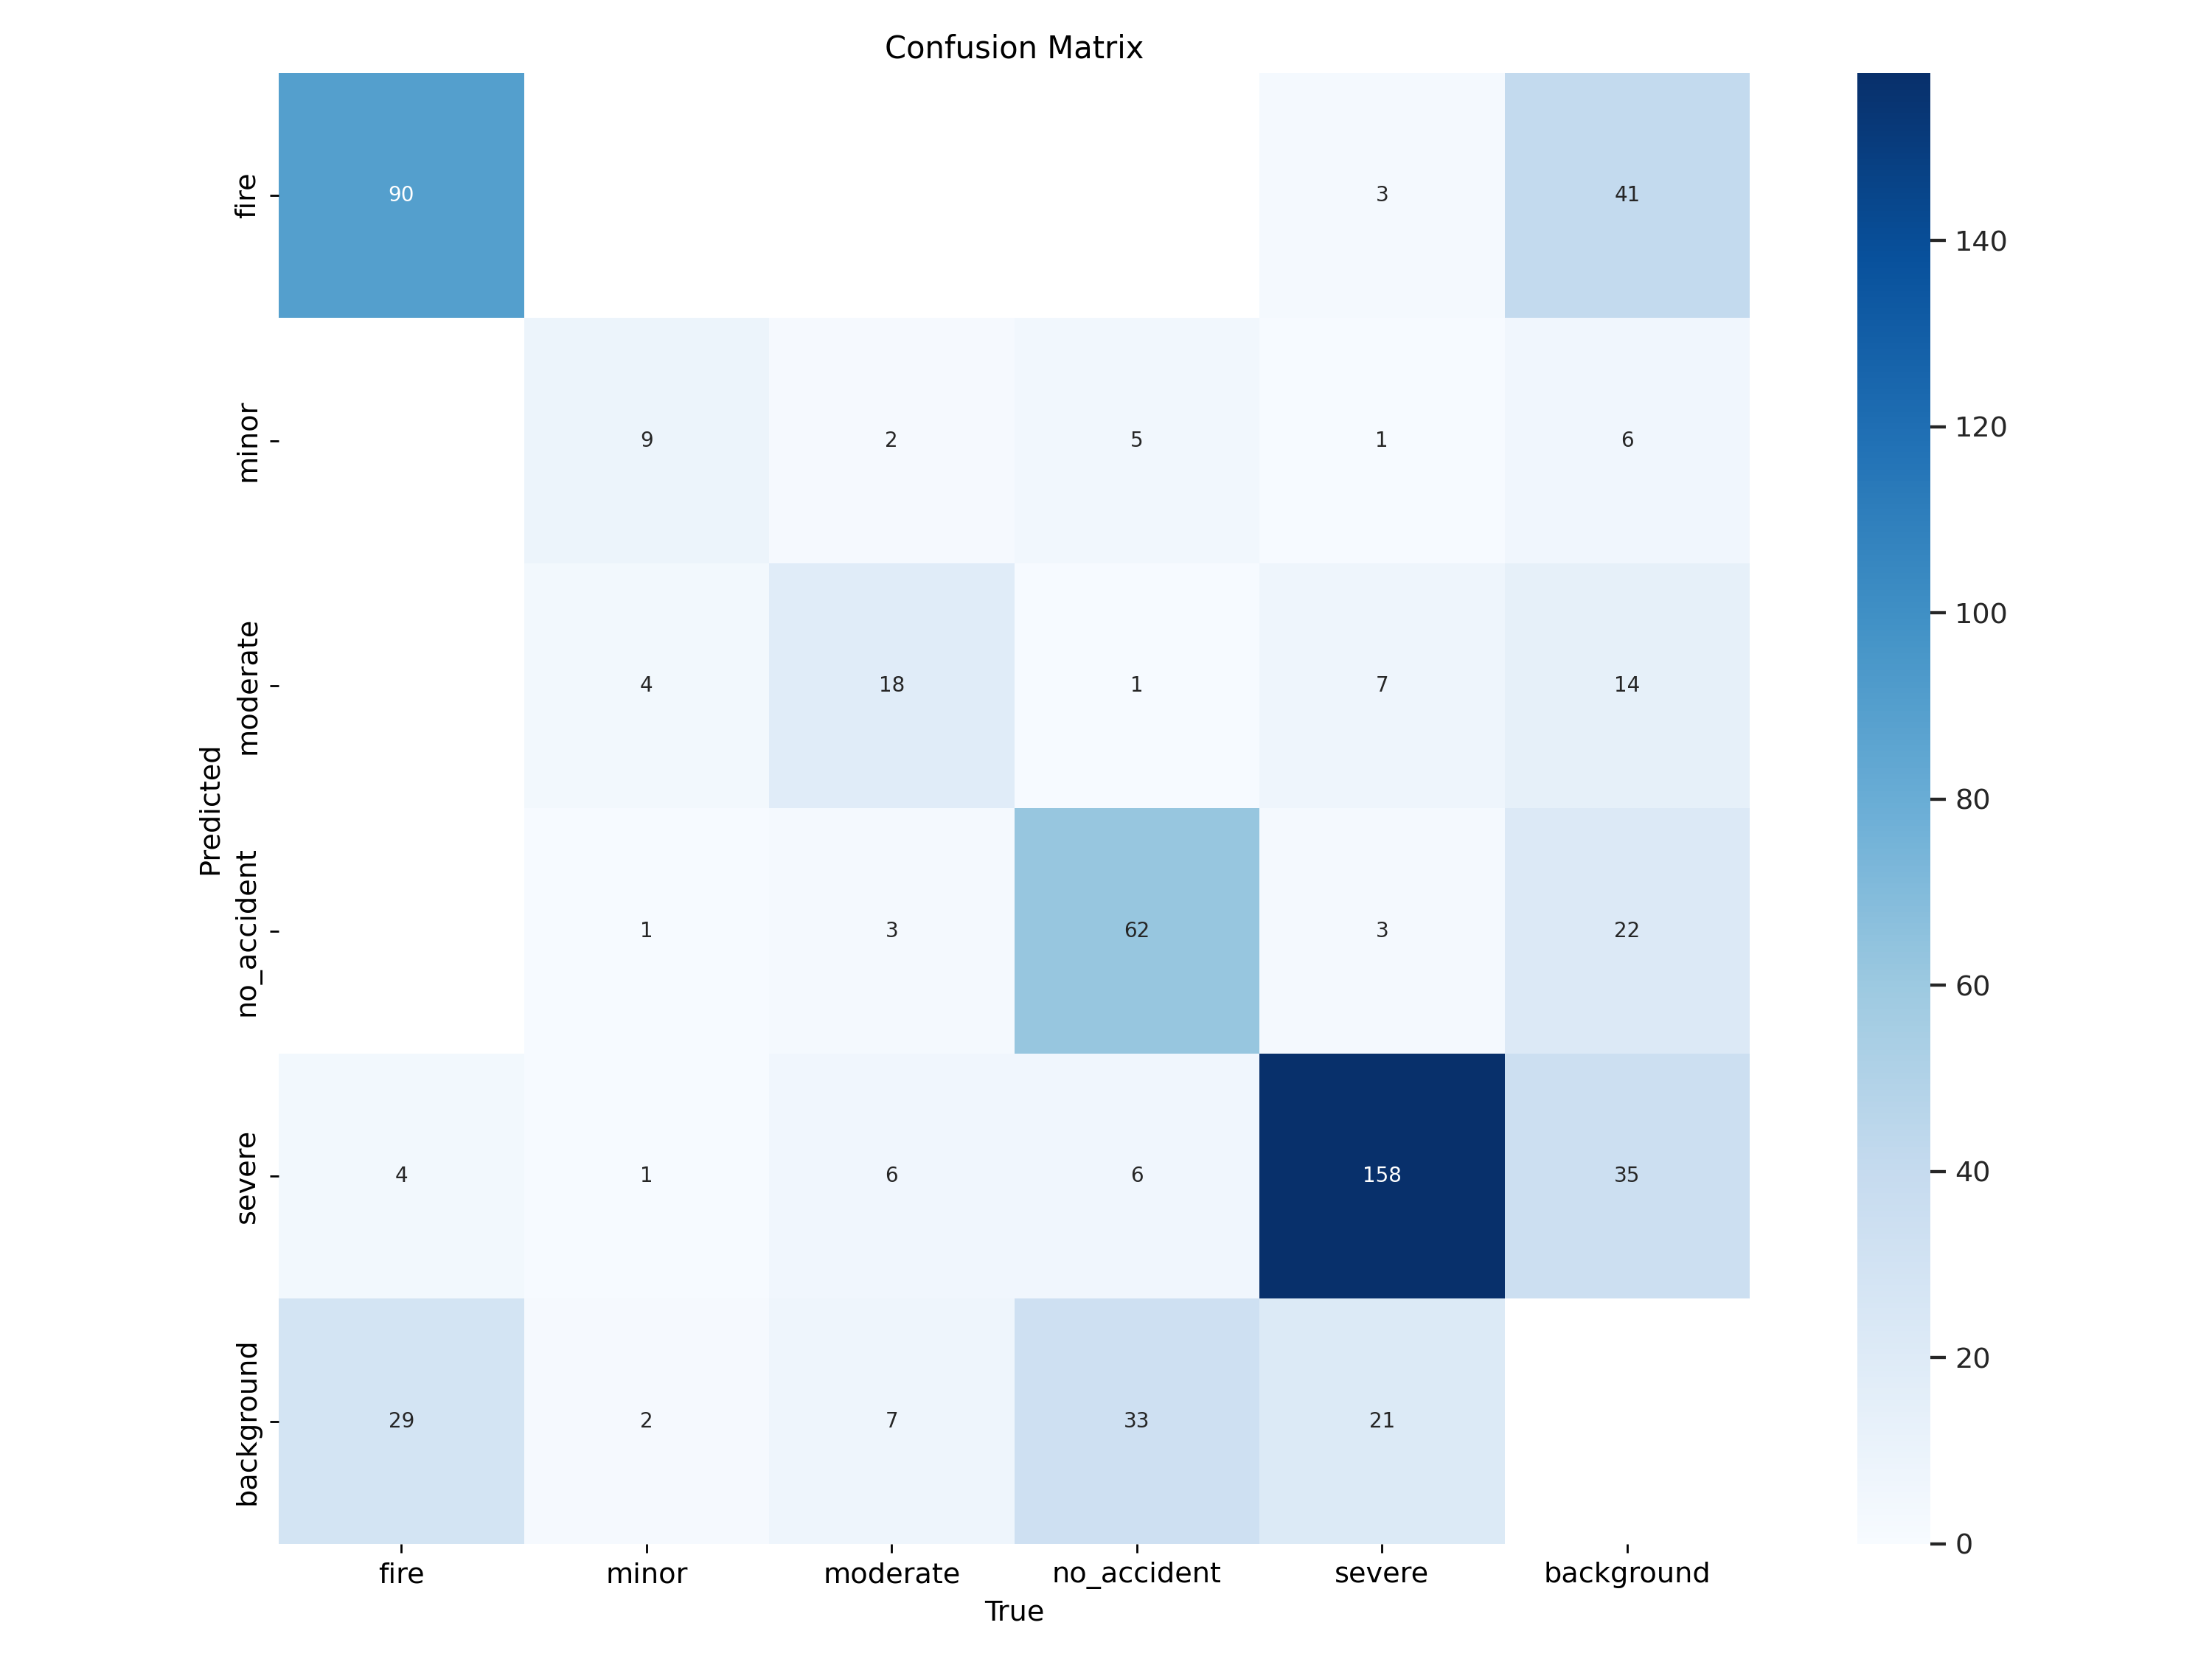

In [49]:
%cd {HOME}
Image(filename='/content/runs/detect/train7/confusion_matrix.png', width=600)

/content


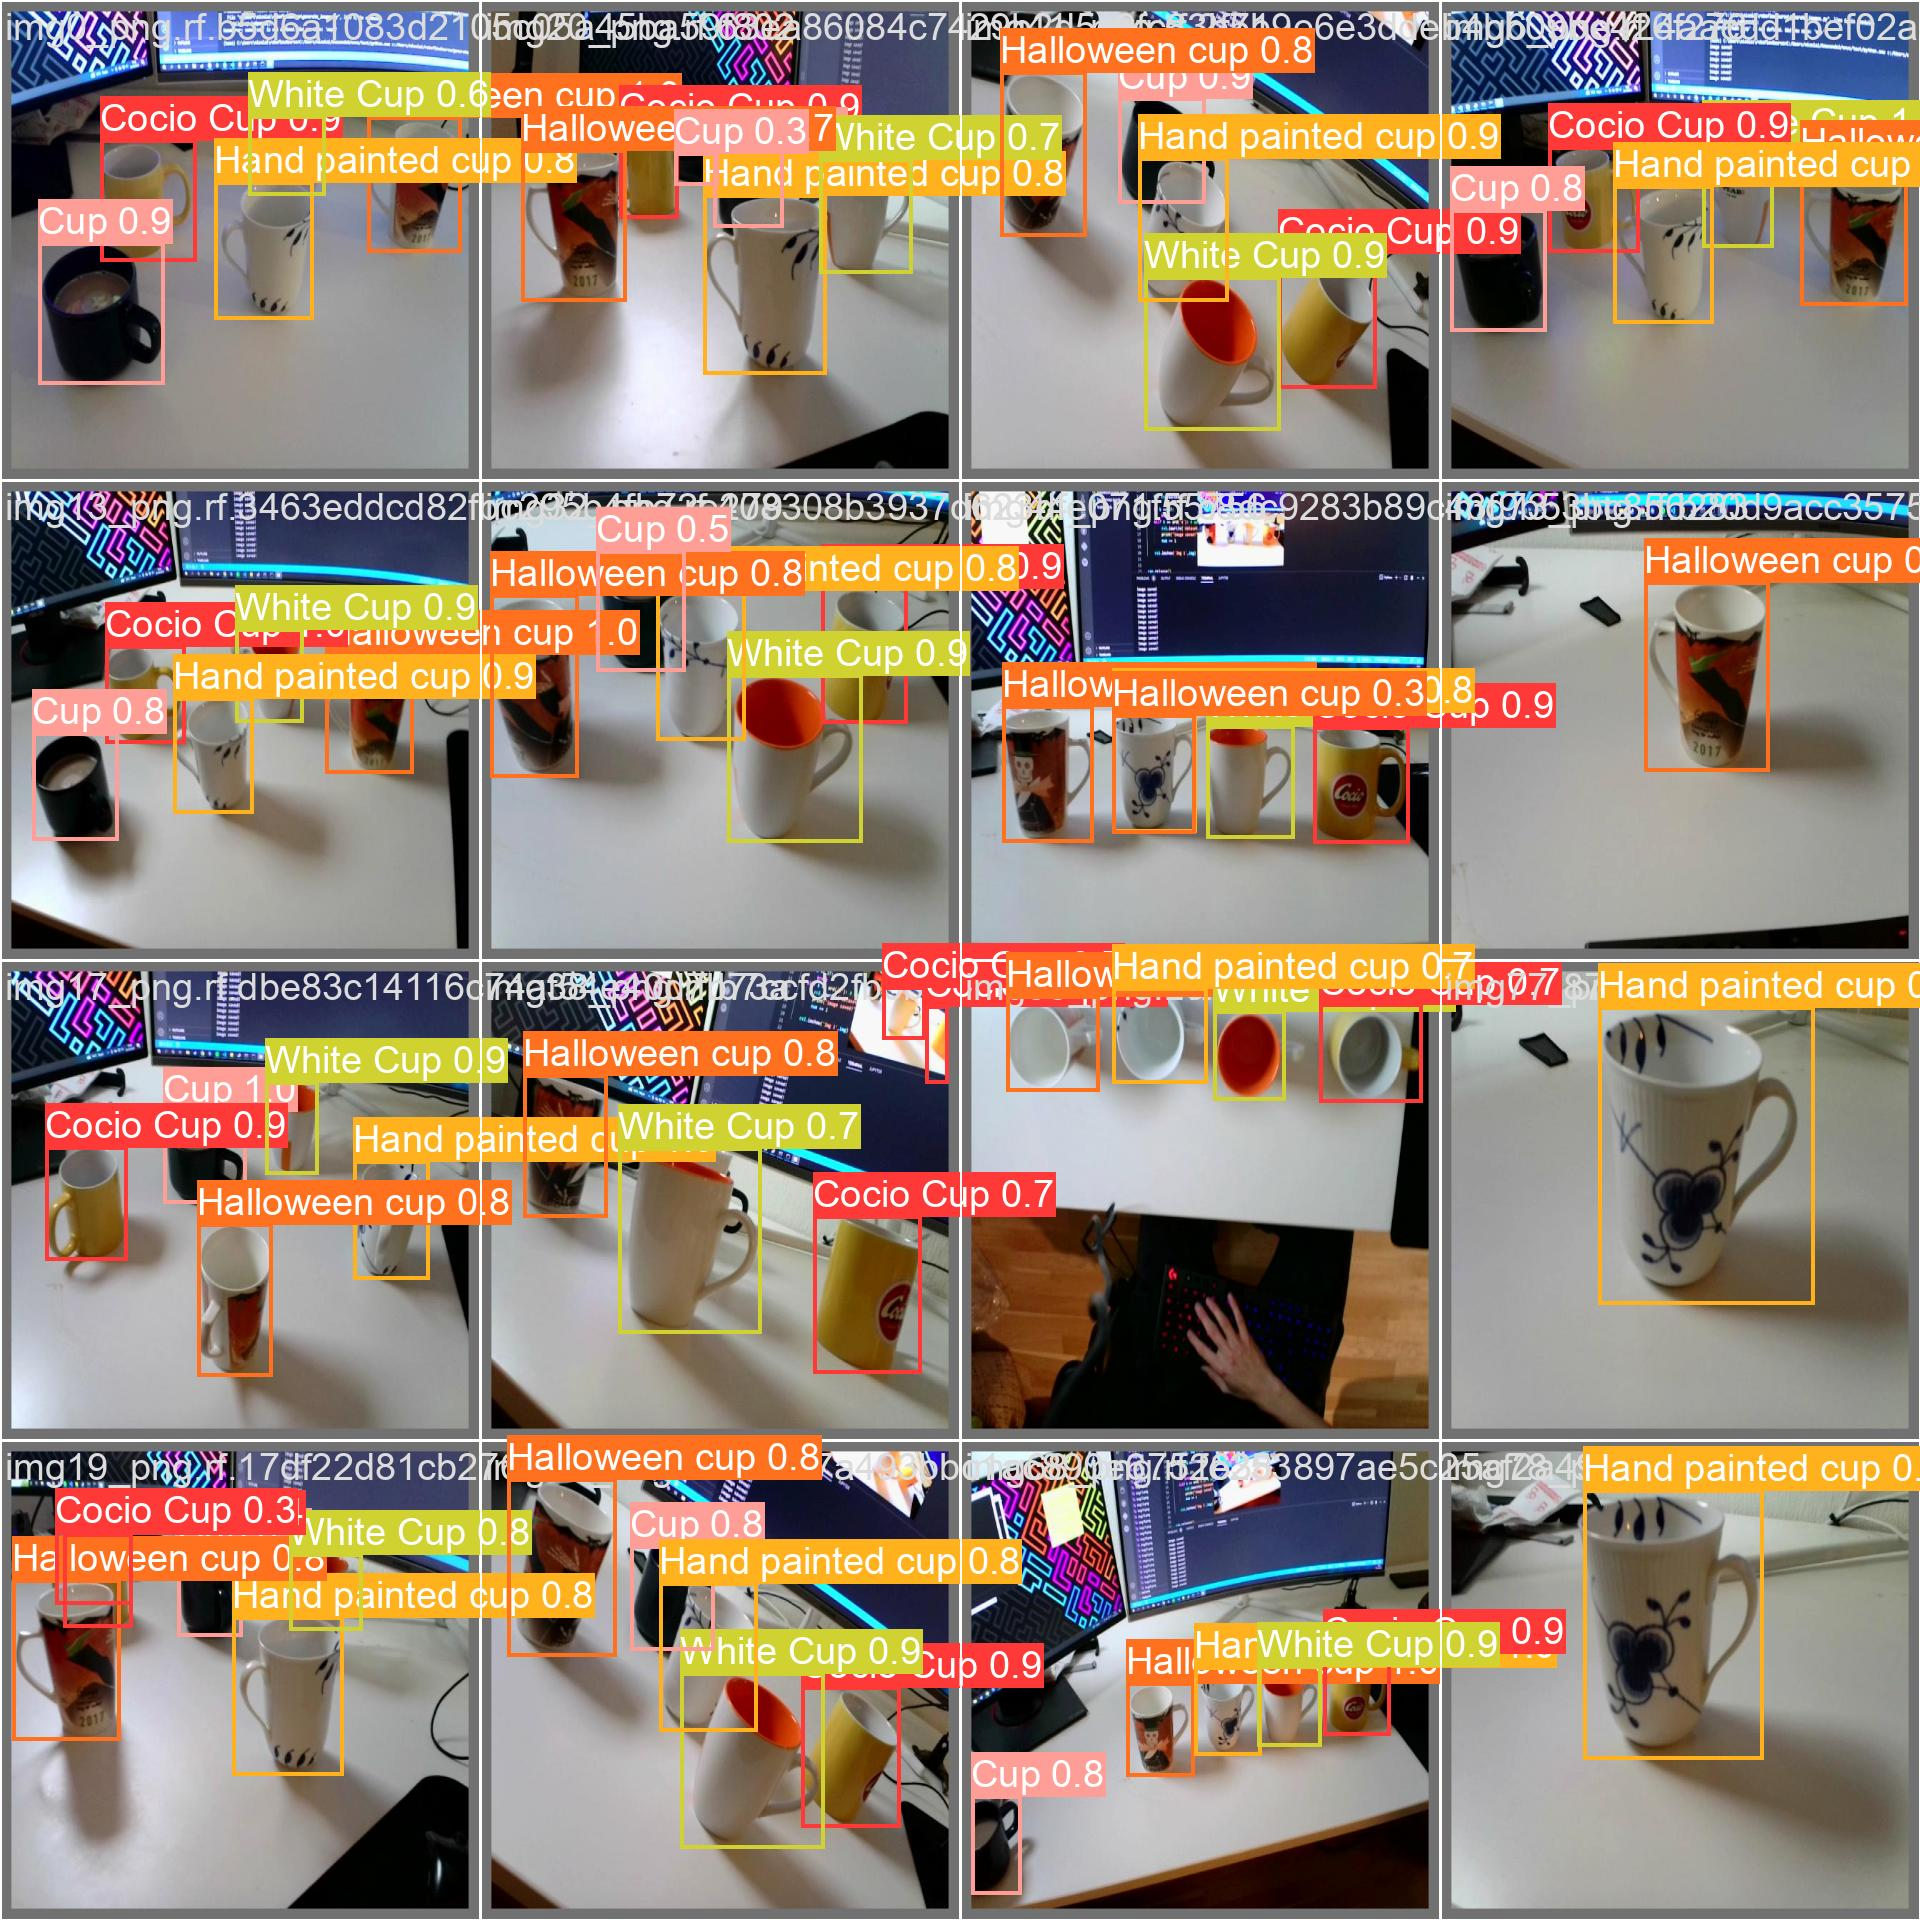

In [40]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train5/val_batch0_pred.jpg', width=600)

#**Validate Custom Model**

In [41]:
%cd {HOME}

!yolo task=detect mode=val model='/content/runs/detect/train5/weights/best.pt' data='/content/datasets/Cup-Detection-v2-3/data.yaml'

/content
Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/Cup-Detection-v2-3/valid/labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100% 19/19 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.28s/it]
                   all         19         71      0.929      0.819      0.817      0.624
             Cocio Cup         19         16       0.84      0.988      0.958      0.795
                   Cup         19         11      0.914          1       0.98      0.782
         Halloween cup         19         14      0.881      0.929      0.961      0.609
      Hand painted cup         19         15      0.968          1      0.995      0.784
             White Cup         19         14       0.97          1      0.995      0.766
                   cup       

#**Inference with Custom Model**

In [42]:
%cd {HOME}
!yolo task=detect mode=predict model='/content/runs/detect/train5/weights/best.pt' conf=0.25 source='/content/datasets/Cup-Detection-v2-3/valid/images/img0_png.rf.b5d6a1083d2105c05a45ba59f8022d20.jpg'

/content
Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/datasets/Cup-Detection-v2-3/valid/images/img0_png.rf.b5d6a1083d2105c05a45ba59f8022d20.jpg: 640x640 1 Cocio Cup, 1 Cup, 1 Halloween cup, 1 Hand painted cup, 1 White Cup, 10.1ms
Speed: 2.7ms preprocess, 10.1ms inference, 528.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


#**Testing on a Demo Video**

In [ ]:
!gdown "https://drive.google.com/uc?id=1bLlfh9gr6JxE9Wacw4xgv5FNijA7j9GZ&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1bLlfh9gr6JxE9Wacw4xgv5FNijA7j9GZ&confirm=t
To: /content/demonew1.mp4
100% 1.26M/1.26M [00:00<00:00, 151MB/s]


In [ ]:
!gdown "https://drive.google.com/uc?id=12Xf-OEDDZ_g-SscYpXA7Mz_aC1XPyYxS&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=12Xf-OEDDZ_g-SscYpXA7Mz_aC1XPyYxS&confirm=t
To: /content/Demo2.mp4
100% 18.0M/18.0M [00:00<00:00, 61.6MB/s]


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model='/content/runs/detect/train2/weights/best.pt' conf=0.25 source='/content/demonew1.mp4'

/content
Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3010718 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (1/563) /content/demonew1.mp4: 384x640 1 F, 90.4ms
video 1/1 (2/563) /content/demonew1.mp4: 384x640 1 F, 7.3ms
video 1/1 (3/563) /content/demonew1.mp4: 384x640 1 F, 7.1ms
video 1/1 (4/563) /content/demonew1.mp4: 384x640 1 F, 6.4ms
video 1/1 (5/563) /content/demonew1.mp4: 384x640 1 F, 6.4ms
video 1/1 (6/563) /content/demonew1.mp4: 384x640 1 F, 6.3ms
video 1/1 (7/563) /content/demonew1.mp4: 384x640 1 F, 6.2ms
video 1/1 (8/563) /content/demonew1.mp4: 384x640 1 F, 6.7ms
video 1/1 (9/563) /content/demonew1.mp4: 384x640 1 F, 7.6ms
video 1/1 (10/563) /content/demonew1.mp4: 384x640 1 F, 7.0ms
video 1/1 (11/563) /content/demonew1.mp4: 384x640 1 F, 6.4ms
video 1/1 (12/563) /content/demonew1.mp4: 384x640 1 F, 10.4ms
video 1/1 (13/563) /content/demonew1.mp4: 384x640 1 F, 6.4ms
video 1/1 (14/563) /content/demonew1.

#**Display the Demo Video**

In [ ]:
!rm "/content/result_compressed.mp4"

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict2/demonew1.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

#**Test on Demo Video 2**

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model='/content/runs/detect/train2/weights/best.pt' conf=0.25 source='/content/Demo2.mp4'

/content
Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3010718 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (1/969) /content/Demo2.mp4: 384x640 1 W, 91.3ms
video 1/1 (2/969) /content/Demo2.mp4: 384x640 1 W, 7.0ms
video 1/1 (3/969) /content/Demo2.mp4: 384x640 1 W, 6.2ms
video 1/1 (4/969) /content/Demo2.mp4: 384x640 1 F, 6.9ms
video 1/1 (5/969) /content/Demo2.mp4: 384x640 1 F, 6.3ms
video 1/1 (6/969) /content/Demo2.mp4: 384x640 1 F, 1 W, 6.4ms
video 1/1 (7/969) /content/Demo2.mp4: 384x640 1 F, 6.6ms
video 1/1 (8/969) /content/Demo2.mp4: 384x640 1 F, 6.3ms
video 1/1 (9/969) /content/Demo2.mp4: 384x640 1 F, 6.4ms
video 1/1 (10/969) /content/Demo2.mp4: 384x640 1 F, 7.9ms
video 1/1 (11/969) /content/Demo2.mp4: 384x640 1 F, 6.2ms
video 1/1 (12/969) /content/Demo2.mp4: 384x640 1 W, 7.6ms
video 1/1 (13/969) /content/Demo2.mp4: 384x640 1 B, 9.4ms
video 1/1 (14/969) /content/Demo2.mp4: 384x640 1 B, 6.4ms
video 1/1 (15/

#**Display the Demo Video**

In [ ]:
!rm "/content/result_compressed.mp4"

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict3/Demo2.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)